In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import datasets 
from sklearn import metrics
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from scipy import stats
import seaborn as sns
from sklearn.svm import SVC, SVR
np.random.seed(0)

In [40]:
df = pd.read_csv('/content/sample_data/US_Accidents_Dec21_updated.csv')
print(df)
df.head() # To get first n rows from the dataset default value of n is 5 
M=len(df) 
M

<ipython-input-40-6bc1d63c820f>:1: DtypeWarning: Columns (37,38,39,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/sample_data/US_Accidents_Dec21_updated.csv')


                ID  Severity           Start_Time             End_Time  \
0              A-1         3  2016-02-08 00:37:08  2016-02-08 06:37:08   
1              A-2         2  2016-02-08 05:56:20  2016-02-08 11:56:20   
2              A-3         2  2016-02-08 06:15:39  2016-02-08 12:15:39   
3              A-4         2  2016-02-08 06:51:45  2016-02-08 12:51:45   
4              A-5         3  2016-02-08 07:53:43  2016-02-08 13:53:43   
...            ...       ...                  ...                  ...   
2033976  A-2033977         2  2020-12-29 00:42:05  2020-12-29 02:27:05   
2033977  A-2033978         2  2020-12-09 01:51:00  2020-12-09 03:32:38   
2033978  A-2033979         2  2020-12-28 17:50:00  2020-12-28 19:07:46   
2033979  A-2033980         2  2020-10-29 21:57:30  2020-10-30 02:29:00   
2033980  A-2033981         2  2020-11-20 20:38:00  2020-11-20 22:06:34   

         Start_Lat   Start_Lng    End_Lat     End_Lng  Distance(mi)  \
0        40.108910  -83.092860  40.11206

2033981

In [41]:
df['Side'] = df['Side'].map({'R':1, 'L':0})
df['Side']
# w['female'] = w['female'].map({'female': 1, 'male': 0})

0          1.0
1          1.0
2          1.0
3          1.0
4          1.0
          ... 
2033976    1.0
2033977    1.0
2033978    1.0
2033979    1.0
2033980    1.0
Name: Side, Length: 2033981, dtype: float64

In [42]:
df.dropna(inplace=True)

In [43]:
check_nan = df.isnull().values.sum()
print(check_nan)

0


In [44]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [45]:
df.drop(columns=['ID', 'Description', 'Street',
        'City', 'County', 'State', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],inplace=True)
df.head()

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Side,Zipcode
42,4,2016-02-09 18:20:58,2016-02-10 00:20:58,40.45112,-85.15048,40.35429,-85.14993,6.690,9001.0,1.0,47336
43,4,2016-02-09 18:20:58,2016-02-10 00:20:58,40.35429,-85.14993,40.45112,-85.15048,6.690,473.0,1.0,47373-9430
47,4,2016-02-10 06:18:49,2016-02-10 12:18:49,40.72813,-84.78965,40.74559,-84.78962,1.206,12998.0,1.0,45898-9523
50,2,2016-02-10 08:35:27,2016-02-10 14:35:27,41.83193,-80.10143,41.84149,-80.11099,0.824,25529.0,0.0,16403
66,2,2016-02-10 12:54:39,2016-02-10 18:54:39,41.48339,-81.66297,41.47692,-81.66075,0.462,3937.0,0.0,44115


In [46]:
df[['Start_Time','StTime']] = df['Start_Time'].str.split(expand=True)
df[['End_Time','EnTime']] = df['End_Time'].str.split(expand=True)
df

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Side,Zipcode,StTime,EnTime
42,4,2016-02-09,2016-02-10,40.451120,-85.150480,40.354290,-85.149930,6.690,9001.0,1.0,47336,18:20:58,00:20:58
43,4,2016-02-09,2016-02-10,40.354290,-85.149930,40.451120,-85.150480,6.690,473.0,1.0,47373-9430,18:20:58,00:20:58
47,4,2016-02-10,2016-02-10,40.728130,-84.789650,40.745590,-84.789620,1.206,12998.0,1.0,45898-9523,06:18:49,12:18:49
50,2,2016-02-10,2016-02-10,41.831930,-80.101430,41.841490,-80.110990,0.824,25529.0,0.0,16403,08:35:27,14:35:27
66,2,2016-02-10,2016-02-10,41.483390,-81.662970,41.476920,-81.660750,0.462,3937.0,0.0,44115,12:54:39,18:54:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2033962,2,2020-11-27,2020-11-27,30.456258,-84.277507,30.456268,-84.276487,0.061,1300.0,0.0,32303-5608,18:33:00,20:25:59
2033963,2,2020-11-05,2020-11-05,42.933803,-85.666989,42.933876,-85.671914,0.249,2.0,0.0,49507-1621,19:03:02,20:18:02
2033964,2,2020-10-02,2020-10-03,25.899505,-80.185357,25.899528,-80.184815,0.034,676.0,1.0,33161-7519,23:47:51,02:46:14
2033966,2,2020-10-10,2020-10-10,28.553187,-81.367283,28.553179,-81.366531,0.046,852.0,1.0,32803-4639,21:50:00,23:22:33


In [47]:
df['Start_Time']=df['Start_Time'].str.replace('-','')
df['End_Time']=df['End_Time'].str.replace('-','')
df['StTime']=df['StTime'].str.replace(':','')
df['EnTime']=df['EnTime'].str.replace(':','')
df['Zipcode'] = df['Zipcode'].str.replace('-','')
df

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Side,Zipcode,StTime,EnTime
42,4,20160209,20160210,40.451120,-85.150480,40.354290,-85.149930,6.690,9001.0,1.0,47336,182058,002058
43,4,20160209,20160210,40.354290,-85.149930,40.451120,-85.150480,6.690,473.0,1.0,473739430,182058,002058
47,4,20160210,20160210,40.728130,-84.789650,40.745590,-84.789620,1.206,12998.0,1.0,458989523,061849,121849
50,2,20160210,20160210,41.831930,-80.101430,41.841490,-80.110990,0.824,25529.0,0.0,16403,083527,143527
66,2,20160210,20160210,41.483390,-81.662970,41.476920,-81.660750,0.462,3937.0,0.0,44115,125439,185439
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2033962,2,20201127,20201127,30.456258,-84.277507,30.456268,-84.276487,0.061,1300.0,0.0,323035608,183300,202559
2033963,2,20201105,20201105,42.933803,-85.666989,42.933876,-85.671914,0.249,2.0,0.0,495071621,190302,201802
2033964,2,20201002,20201003,25.899505,-80.185357,25.899528,-80.184815,0.034,676.0,1.0,331617519,234751,024614
2033966,2,20201010,20201010,28.553187,-81.367283,28.553179,-81.366531,0.046,852.0,1.0,328034639,215000,232233


In [48]:
# df['Start_Time'] = pd.to_datetime(df['Start_Time'], format='%Y%m%d')
# #pd.to_datetime(df['Start_Time'])
# df

In [49]:
# df = df.sample(100)
# print(len(df))

In [98]:
X = df.iloc[:, 1:13].values
Y = df.iloc[:,0:1].values
# Y = Y.reshape(-1,1)
print(X)
print(Y)

[['20160209' '20160210' 40.45112 ... '47336' '182058' '002058']
 ['20160209' '20160210' 40.35429 ... '473739430' '182058' '002058']
 ['20160210' '20160210' 40.72813 ... '458989523' '061849' '121849']
 ...
 ['20201002' '20201003' 25.899505 ... '331617519' '234751' '024614']
 ['20201010' '20201010' 28.553187 ... '328034639' '215000' '232233']
 ['20201102' '20201102' 33.954187 ... '900021814' '204300' '224337']]
[[4]
 [4]
 [4]
 ...
 [2]
 [2]
 [2]]


In [99]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,random_state = 0, train_size = .8)
print(f"No. of training examples: {X_train.shape[0]}")
print(f"No. of testing examples: {X_test.shape[0]}")
print(f"No. of training examples: {Y_train.shape[0]}")
print(f"No. of testing examples: {Y_test.shape[0]}")

No. of training examples: 635749
No. of testing examples: 158938
No. of training examples: 635749
No. of testing examples: 158938


In [100]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [101]:
X_0 = np.ones((X_train.shape[0],1))
X_0V = np.ones((X_test.shape[0],1))


In [102]:
K = np.array(range(13))
K_max = 13
accuracy = np.zeros(13)
precision = np.zeros(13)
recall = np.zeros(13)
mse = np.zeros(13)

In [103]:
from sklearn.naive_bayes import GaussianNB
for k in K:

    pca = PCA(n_components = k)
    principalComponents = pca.fit_transform(X)

    X_train, X_val, Y_train, Y_val = train_test_split(X, Y, train_size = 0.8, test_size = 0.2)
    
    classifier = GaussianNB()
    classifier.fit(X_train, Y_train)

    Y_pred = classifier.predict(X_val)
    
    accuracy[k] = metrics.accuracy_score(Y_val, Y_pred)
   


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

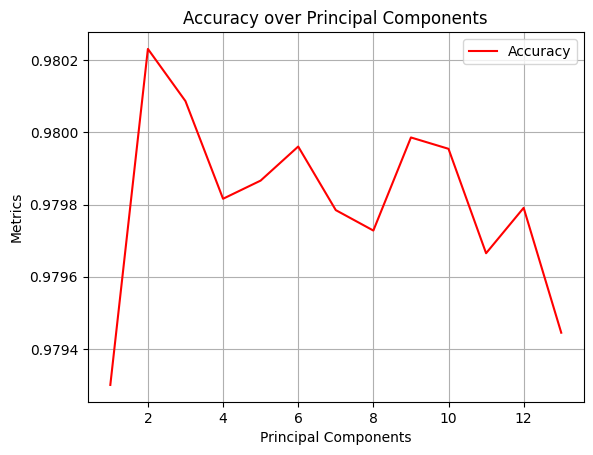

In [104]:
plt.figure()
plt.plot(range(1, K_max+1), accuracy, color = 'red', label = "Accuracy")
plt.grid()
plt.xlabel('Principal Components')
plt.ylabel('Metrics')
plt.title('Accuracy over Principal Components')
plt.legend()

In [105]:
print(accuracy[k])

0.9794448149592923


In [106]:
from sklearn.metrics import confusion_matrix

def get_confusion_matrix(cnf_matrix):
  class_names=[0,1] # name of classes
  fig, ax = plt.subplots()
  tick_marks = np.arange(len(class_names))
  plt.xticks(tick_marks, class_names)
  plt.yticks(tick_marks, class_names)
  # create heatmap
  sns.heatmap(pd.DataFrame(cnf_matrix), annot=True,fmt='g')
  ax.xaxis.set_label_position("top")
  plt.tight_layout()
  plt.title('Confusion matrix', y=1.1)
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')



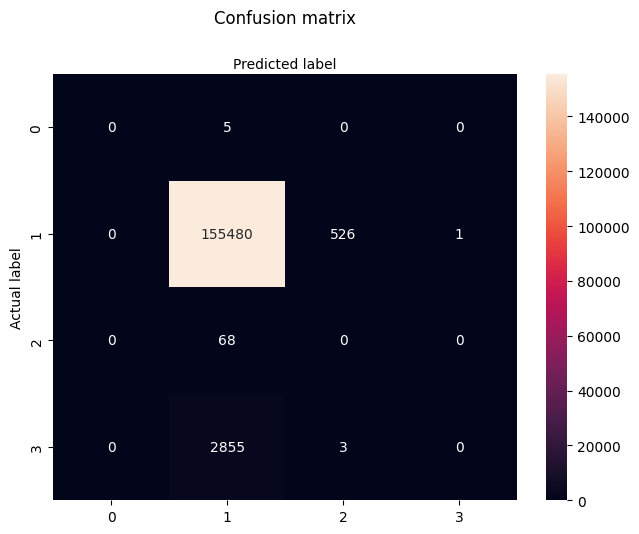

In [107]:
cnf_matrix = confusion_matrix(Y_test, Y_pred)
get_confusion_matrix(cnf_matrix)

In [108]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0)

In [109]:
Y_Pred = classifier.predict(X_test)
# Y_pred.reshape(-1,1)
print(Y_Pred.shape)

(158938,)


In [110]:
accuracy = classifier.score(Y_test, Y_Pred)
print(accuracy)

ValueError: ignored

In [ ]:
cnf_matrix = confusion_matrix(Y_test, Y_Pred)
get_confusion_matrix(cnf_matrix)

In [ ]:
plt.figure()
plt.plot(range(1, K_max+1), accuracy_LG, color = 'red', label = "Accuracy")
plt.grid()
plt.xlabel('Principal Components')
plt.ylabel('Metrics')
plt.title('Accuracy over Principal Components')
plt.legend()

In [ ]:
# Import the necessary libraries
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Calculate the mean squared error (MSE) between the predicted targets and the actual targets
mse = mean_squared_error(Y_test, Y_pred)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(mse)

# Calculate the mean absolute error (MAE)
mae = mean_absolute_error(Y_test, Y_pred)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)

In [ ]:
accuracy12 = {'Accuracy of #1':accuracy, 'Accuracy of #2 with Kfold 5':accuracy_LG}#,'Accuracy of #2 with Kfold 10':acc2_2}
names = list(accuracy12.keys())
values = list(accuracy12.values())
fig = plt.figure(figsize = (8, 3))
# creating the bar plot
plt.bar(names, values, width = 0.2)
plt.xlabel("Experiments")
plt.ylabel("Accuracy values")
plt.title("Accuracy Comparision between Problem 1 and 2")
plt.show()


In [ ]:
# for k in K: 
    
#     pca = PCA(n_components = k)
#     principalComponents = pca.fit_transform(X)

#     X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, test_size = 0.2)

#     # Linear Support vector regression model
#     model = SVR(kernel = 'linear', C = 1E3)
#     model.fit(X_train, Y_train)

#     Y_pred = model.predict(X_test)

#     accuracy[k] = model.score(X_test, Y_test)
#     mse[k] = mean_squared_error(Y_test, Y_pred)



In [ ]:
svr_rbf=SVR(kernel='rbf',C=1e3,gamma=0.1)
y_rbf=svr_rbf.fit(X_train, Y_train).predict(X_test)
accuracy_rbf = svr_rbf.score(X_test, y_rbf)
print(accuracy_rbf)

In [ ]:
svr_poly=SVR(kernel='poly',C=1e3,degree=2)
y_poly=svr_poly.fit(X_train, Y_train).predict(X_test)
accuracy_poly = svr_poly.score(X_test, y_poly)
print(accuracy_poly)

In [ ]:
svr_lin=SVR(kernel='linear',C=1e3)
y_lin=svr_lin.fit(X_train, Y_train).predict(X_test)
accuracy_lin =svr_lin.score(X_test, y_lin)
print(accuracy_lin)



In [ ]:
print(len(Y_train),len(Y_test))

In [ ]:
lw=2
plt.scatter(Y_test, X_test[:,0],color='darkorange', label='data')
plt.scatter(Y_test, X_test[:,1],color='darkorange')
plt.scatter(Y_test, X_test[:,2],color='darkorange')
plt.scatter(Y_test, X_test[:,3],color='darkorange')
plt.scatter(Y_test, X_test[:,4],color='darkorange')
plt.scatter(Y_test, X_test[:,5],color='darkorange')
plt.scatter(Y_test, X_test[:,6],color='darkorange')
plt.scatter(Y_test, X_test[:,7],color='darkorange')
plt.scatter(Y_test, X_test[:,8],color='darkorange')
plt.scatter(Y_test, X_test[:,9],color='darkorange')
plt.scatter(Y_test, X_test[:,10],color='darkorange')
plt.scatter(Y_test, X_test[:,11],color='darkorange')
#plt.scatter(Y_test, X_test[:,12],color='darkorange')
plt.plot(Y_test, y_rbf,color='navy',lw=lw, label='RBF model')
plt.plot(Y_test, y_lin,color='c',lw=lw, label='Linear model')
plt.plot(Y_test, y_poly,color='cornflowerblue',lw=lw, label='Polynommial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('support vector Regression')
plt.legend()
plt.show()


In [ ]:
# # Create an SVM regression model with a linear kernel
# model = SVR(kernel='linear')
# # Train the model on the training set
# model.fit(X_train, Y_train)
# # Use the trained model to make predictions on the testing set
# Y_pred = model.predict(X_test)